## Lab02 - Assignment 2: Softmax Regression using Gradient Descent

In [212]:
import pandas as pd
import numpy as np

In [213]:
data = pd.read_csv('predict+students+dropout+and+academic+success.csv', sep=';')

In [214]:
#Map lại cột Course
course_unique, course_map = np.unique(data['Course'], return_inverse=True)
data['Course'] = course_map + 1

In [215]:
#Chuẩn hóa
for col in data.columns:
    if data[col].dtype == np.float64:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

In [216]:
#Chia tập dữ liệu
X = data.drop(columns=['Target']).to_numpy()
y = data['Target'].to_numpy().reshape(-1,1)
print('dataset:', X.shape, y.shape)

dataset: (4424, 36) (4424, 1)


In [217]:
y

array([['Dropout'],
       ['Graduate'],
       ['Dropout'],
       ...,
       ['Dropout'],
       ['Graduate'],
       ['Graduate']], shape=(4424, 1), dtype=object)

In [ ]:
def one_hot_encode(y):
    y = np.array(y, dtype=str).flatten() #Chuyển đổi về dạng 1 chiều

    y_encoded = np.zeros((len(y), len(np.unique(y))))

    index = {label: i for i, label in enumerate(np.unique(y))} 

    for i, label in enumerate(y):
        y_encoded[i, index[label]] = 1
    return y_encoded

y = one_hot_encode(y)
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], shape=(4424, 3))

In [219]:
split_index = int(0.8 * X.shape[0])
X_train, X_test = np.split(X, [split_index])
y_train, y_test = np.split(y, [split_index])

print('train:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

train: (3539, 36) (3539, 3)
test: (885, 36) (885, 3)


## Softmax Regression

In [221]:
class SoftmaxRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []

    def softmax(self, s: np.ndarray) -> np.ndarray:
        s -= np.max(s, axis=1, keepdims=True) #tránh tràn số
        return np.exp(s) / np.sum(np.exp(s), axis=1, keepdims=True)

    def cross_entropy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        eps = 1e-10
        return -np.mean(np.sum(y * np.log(y_hat + eps), axis=1))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0]
        self.theta = np.zeros((X.shape[1], y.shape[1]))

        for e in range(self.epoch):
            y_hat = self.predict(X)
            diff = y_hat - y
            gradient = 1/n * (X.T @ diff)
            self.theta -= self.lr*gradient

            loss = self.cross_entropy(y, y_hat)
            acc = self.accuracy(y, y_hat)

            self.losses.append(loss)
            self.metrics.append(acc)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return self.softmax(X @ self.theta)

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - y_hat)).mean()

In [230]:
softmaxReg = SoftmaxRegression(10000, 0.001)
softmaxReg.fit(X_train, y_train)
y_pred = softmaxReg.predict(X_test)
accuracy = softmaxReg.accuracy(y_test, y_pred)
print(accuracy)

0.7639261637733072


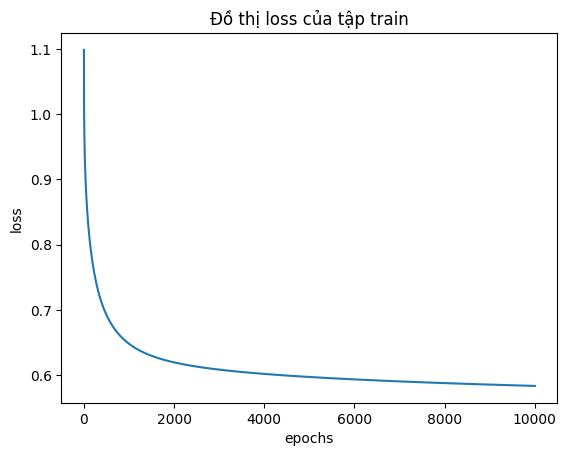

In [231]:
from matplotlib.pylab import plt

train_loss = softmaxReg.losses

plt.plot(range(1, softmaxReg.epoch + 1), softmaxReg.losses)
plt.title('Đồ thị loss của tập train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()